In [490]:
%pip install pandas statsmodels seaborn matplotlib scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [491]:
# インポート
import pandas as pd
import statsmodels.api as sm
from statsmodels.tools import add_constant
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [492]:
# JSONLファイルのパス
jsonl_file_path = './data/listings_2024_sales.json'  # ご自身のファイルパスに置き換えてください

# データをDataFrameに変換
df = pd.read_json(jsonl_file_path, lines=True)


In [493]:
df.head()

,manual_id,listing_name,room_type_id,owner_name,stay_operation_type,prefecture_name,city_name,floor_plan,sqm,number_of_capacity,...,number_of_s_beds,number_of_sd_beds,number_of_d_beds,number_of_q_beds,number_of_k_beds,number_of_futons,number_of_sofa_beds,total_adr,minpaku_adr,monthly_adr
0,18-4,REJルフレ恵比寿 403,1f517349-4cc2-47a3-9e70-99669ae22477,MT,住宿,東京都,渋谷区,1R,19.00,2,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,8072.677748,12576.291667,6528.581548
1,43-1,ラヴィーハイツ 104,b13f6347-603b-4a76-b627-267d7d715103,MT,特区民泊,大阪府,大阪市港区,1DK,27.00,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5595.319149,5883.578947,5000.000000
2,71-2,アイディ大森20 406,4e9b9b65-9e8e-432e-92db-53c6900e5bd0,MT,住宿,東京都,大田区,1K,25.99,4,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,8341.010638,11029.804054,6595.653509
3,97-4,トルコブルービル 502,f3222b01-b1ae-4e4e-89a5-8dd06f6e1d5e,MT,住宿,東京都,墨田区,1K,37.24,5,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,8459.772487,13115.636364,7268.737542
4,104-1,ヴィンテージデザイン神楽坂 202,17c76a00-0cad-496c-9c22-bdff3857a63a,MT,住宿,東京都,新宿区,1R,18.55,3,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,8288.753623,10153.216216,6132.968750


In [494]:
# 統計情報

df.describe()

,sqm,number_of_capacity,location_floor,built_year,number_of_s_beds,number_of_sd_beds,number_of_d_beds,number_of_q_beds,number_of_k_beds,number_of_futons,number_of_sofa_beds,total_adr,minpaku_adr,monthly_adr
count,1599.000000,1599.000000,1551.000000,1598.000000,31.000000,64.000000,171.000000,1.0,2.0,31.000000,50.000000,1599.000000,1599.000000,1599.000000
mean,27.255066,3.255159,3.703417,2014.397372,1.483871,1.375000,1.105263,1.0,1.0,1.322581,1.040000,9569.396606,11888.186557,7308.135433
std,11.365421,1.440496,2.160880,14.598030,0.676805,0.519462,0.447905,NaN,0.0,0.475191,0.197949,3948.880015,5857.820130,2631.249355
min,10.710000,1.000000,1.000000,1900.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,4917.394487,4734.975610,2105.238095
25%,20.130000,2.000000,2.000000,2014.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,7225.552140,8312.126603,5917.189347
50%,25.450000,3.000000,3.000000,2022.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,8565.012195,10755.725000,6738.402878
75%,30.180000,4.000000,5.000000,2023.000000,2.000000,2.000000,1.000000,1.0,1.0,2.000000,1.000000,10278.724820,13285.633784,7798.802494
max,106.100000,12.000000,19.000000,2024.000000,4.000000,3.000000,4.000000,1.0,1.0,2.000000,2.000000,45828.060000,67264.141593,31972.223350


In [495]:
# 欠損値の数
df.isnull().sum()


manual_id                 0
listing_name              0
room_type_id              0
owner_name                0
stay_operation_type       0
prefecture_name           0
city_name                 0
floor_plan                0
sqm                       0
number_of_capacity        0
has_elevator           1320
has_auto_lock          1325
first_line                1
first_station             1
first_walk_min            1
location_floor           48
built_year                1
tag                       0
number_of_s_beds       1568
number_of_sd_beds      1535
number_of_d_beds       1428
number_of_q_beds       1598
number_of_k_beds       1597
number_of_futons       1568
number_of_sofa_beds    1549
total_adr                 0
minpaku_adr               0
monthly_adr               0
dtype: int64

In [496]:
# ダミー変数の追加

df = pd.get_dummies(df, columns=[
    'stay_operation_type',
    'prefecture_name',
    'city_name',
    'floor_plan',
    'tag',
    'first_station',
    'first_line',
], drop_first=True)

df.head()

,manual_id,listing_name,room_type_id,owner_name,sqm,number_of_capacity,has_elevator,has_auto_lock,first_walk_min,location_floor,...,first_line_都営地下鉄大江戸線,first_line_都営大江戸線,first_line_都営大江戸線・東京メトロ副都心線,first_line_都営新宿線,first_line_都営浅草線,first_line_都電荒川線,first_line_阪急電鉄神戸線,first_line_阪神なんば線,first_line_阪神電鉄阪神なんば線,first_line_ＪＲ中央線
0,18-4,REJルフレ恵比寿 403,1f517349-4cc2-47a3-9e70-99669ae22477,MT,19.00,2,無,無,8,4.0,...,False,False,False,False,False,False,False,False,False,False
1,43-1,ラヴィーハイツ 104,b13f6347-603b-4a76-b627-267d7d715103,MT,27.00,4,None,None,10,1.0,...,False,False,False,False,False,False,False,False,False,False
2,71-2,アイディ大森20 406,4e9b9b65-9e8e-432e-92db-53c6900e5bd0,MT,25.99,4,有,有,5,4.0,...,False,False,False,False,False,False,False,False,False,False
3,97-4,トルコブルービル 502,f3222b01-b1ae-4e4e-89a5-8dd06f6e1d5e,MT,37.24,5,有,有,4,5.0,...,False,True,False,False,False,False,False,False,False,False
4,104-1,ヴィンテージデザイン神楽坂 202,17c76a00-0cad-496c-9c22-bdff3857a63a,MT,18.55,3,無,無,3,2.0,...,False,False,False,False,False,False,False,False,False,False


In [497]:
# 欠損値の処理

df['number_of_s_beds'].fillna(0, inplace=True)
df['number_of_sd_beds'].fillna(0, inplace=True)
df['number_of_d_beds'].fillna(0, inplace=True)
df['number_of_q_beds'].fillna(0, inplace=True)
df['number_of_k_beds'].fillna(0, inplace=True)
df['number_of_futons'].fillna(0, inplace=True)
df['number_of_sofa_beds'].fillna(0, inplace=True)

df['first_walk_min'] = pd.to_numeric(df['first_walk_min'], errors='coerce')

df['has_elevator'] = df['has_elevator'].map({'有': 1, '無': 0})
df['has_elevator'].fillna(0.5, inplace=True)

df['has_auto_lock'] = df['has_auto_lock'].map({'有': 1, '無': 0})
df['has_auto_lock'].fillna(0.5, inplace=True)

df = df.dropna()

df.isnull().sum()

/var/folders/pd/2jj0t6nx237d_97r8zs2969c0000gn/T/ipykernel_99368/10565926.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['number_of_s_beds'].fillna(0, inplace=True)
/var/folders/pd/2jj0t6nx237d_97r8zs2969c0000gn/T/ipykernel_99368/10565926.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

manual_id                0
listing_name             0
room_type_id             0
owner_name               0
sqm                      0
                        ..
first_line_都電荒川線         0
first_line_阪急電鉄神戸線       0
first_line_阪神なんば線        0
first_line_阪神電鉄阪神なんば線    0
first_line_ＪＲ中央線         0
Length: 265, dtype: int64

In [498]:
# built_yearは築年数に変換

df['built_year'] = 2024 - df['built_year']

In [499]:
# floor_planの変換

# 1Rから始まるものはfloor_plan_group_1Rにまとめる
df['floor_plan_group_1R'] = df[[column for column in df.columns if column.startswith('floor_plan_1R')]].any(axis=1).astype(int)
df.drop([column for column in df.columns if column.startswith('floor_plan_1R')], axis=1, inplace=True)

# floor_plan_1DK+Sとfloor_plan_1DKSはfloor_plan_1SDKにまとめる
df['floor_plan_1SDK'] = df[['floor_plan_1DKS', 'floor_plan_1DK+S', 'floor_plan_1DKS']].any(axis=1).astype(int)
df.drop(['floor_plan_1DK+S', 'floor_plan_1DKS'], axis=1, inplace=True)

# 1Kから始まるものはfloor_plan_group_1Kにまとめる
df['floor_plan_group_1K'] = df[[column for column in df.columns if column.startswith('floor_plan_1K')]].any(axis=1).astype(int)
df.drop([column for column in df.columns if column.startswith('floor_plan_1K')], axis=1, inplace=True)

# floor_plan_２LDKはfloor_plan_2LDKにまとめる
df['floor_plan_2LDK'] = df[['floor_plan_２LDK', 'floor_plan_2LDK']].any(axis=1).astype(int)
df.drop(['floor_plan_２LDK'], axis=1, inplace=True)

# データがないカラムを一部削除
df.drop(["floor_plan_4DK", "floor_plan_4LDK", "floor_plan_戸建"], axis=1, inplace=True)

In [500]:
# 寝具関連の変換

# number_of_sd_bedsは>0かどうかでbooleanに変換
df['has_sd_bed'] = (df['number_of_sd_beds'] > 0).astype(int)
df.drop('number_of_sd_beds', axis=1, inplace=True)

df['has_d_bed'] = (df['number_of_d_beds'] > 0).astype(int)
df.drop('number_of_d_beds', axis=1, inplace=True)

df['has_q_bed'] = (df['number_of_q_beds'] > 0).astype(int)
df.drop('number_of_q_beds', axis=1, inplace=True)

df['has_k_bed'] = (df['number_of_k_beds'] > 0).astype(int)
df.drop('number_of_k_beds', axis=1, inplace=True)

df['has_futon'] = (df['number_of_futons'] > 0).astype(int)
df.drop('number_of_futons', axis=1, inplace=True)

df['has_sofa_bed'] = (df['number_of_sofa_beds'] > 0).astype(int)
df.drop('number_of_sofa_beds', axis=1, inplace=True)

array([[<Axes: xlabel='sqm', ylabel='sqm'>,
        <Axes: xlabel='number_of_capacity', ylabel='sqm'>,
        <Axes: xlabel='has_elevator', ylabel='sqm'>,
        <Axes: xlabel='has_auto_lock', ylabel='sqm'>,
        <Axes: xlabel='first_walk_min', ylabel='sqm'>,
        <Axes: xlabel='location_floor', ylabel='sqm'>,
        <Axes: xlabel='built_year', ylabel='sqm'>,
        <Axes: xlabel='total_adr', ylabel='sqm'>],
       [<Axes: xlabel='sqm', ylabel='number_of_capacity'>,
        <Axes: xlabel='number_of_capacity', ylabel='number_of_capacity'>,
        <Axes: xlabel='has_elevator', ylabel='number_of_capacity'>,
        <Axes: xlabel='has_auto_lock', ylabel='number_of_capacity'>,
        <Axes: xlabel='first_walk_min', ylabel='number_of_capacity'>,
        <Axes: xlabel='location_floor', ylabel='number_of_capacity'>,
        <Axes: xlabel='built_year', ylabel='number_of_capacity'>,
        <Axes: xlabel='total_adr', ylabel='number_of_capacity'>],
       [<Axes: xlabel='sqm', ylabel=

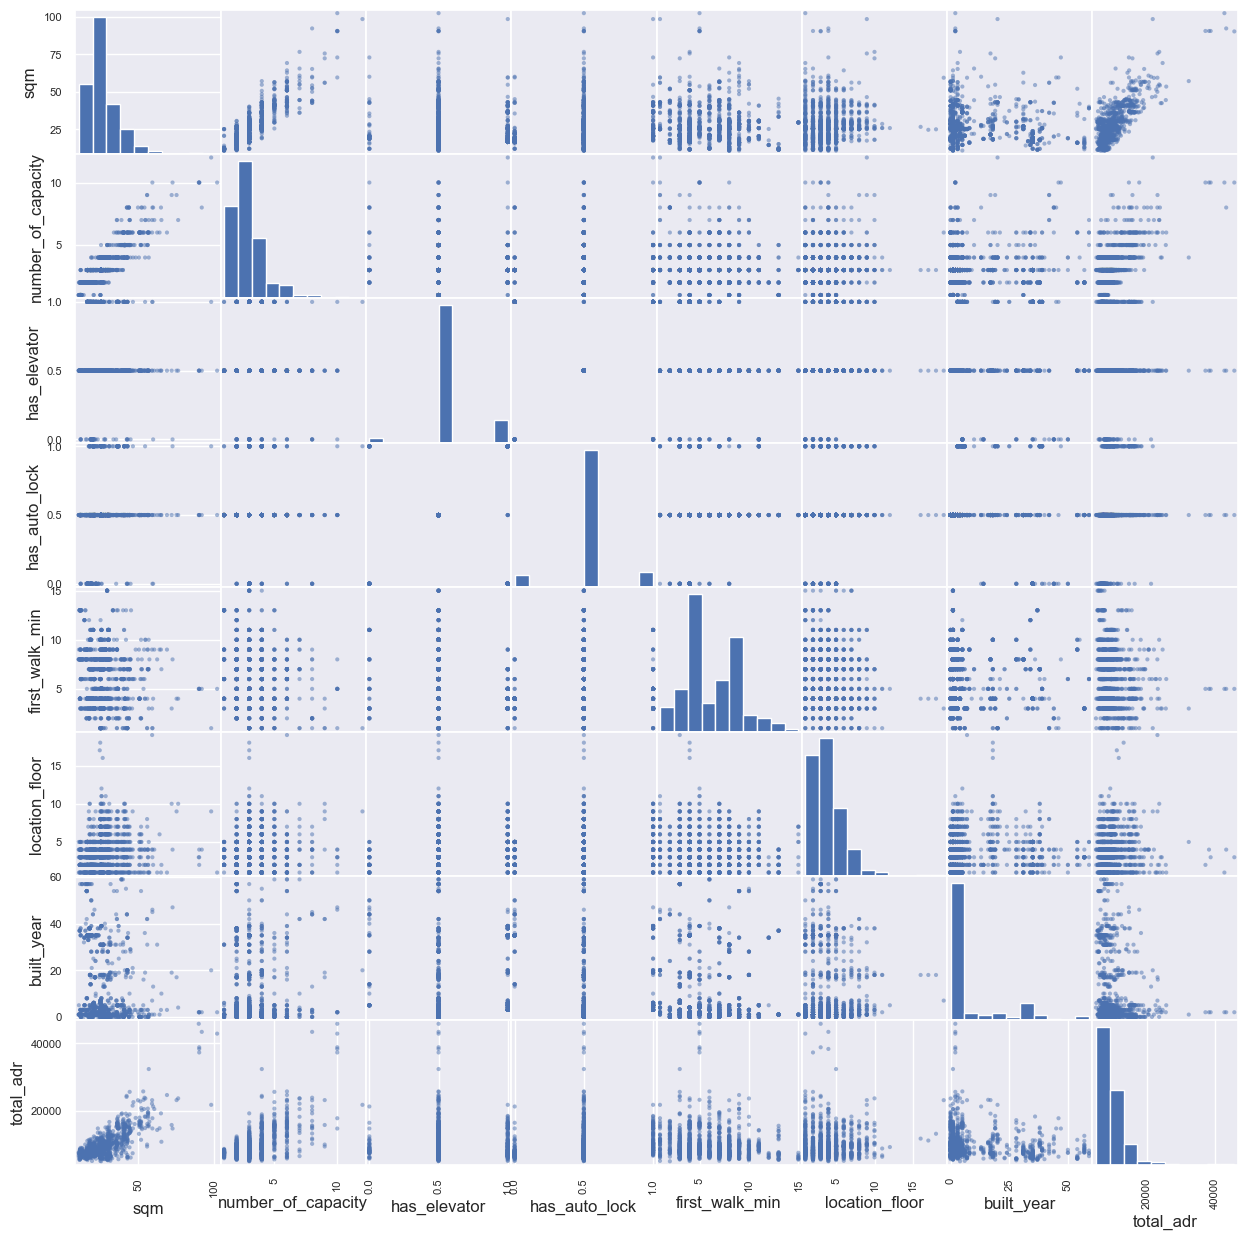

In [501]:
from pandas import plotting

plotting.scatter_matrix(
    df[[
        "sqm",
        "number_of_capacity",
        "has_elevator",
        "has_auto_lock",
        "first_walk_min",
        "location_floor",
        "built_year",
        "total_adr",
    ]],
    figsize=(15, 15),
)

In [502]:
df.head()

,manual_id,listing_name,room_type_id,owner_name,sqm,number_of_capacity,has_elevator,has_auto_lock,first_walk_min,location_floor,...,first_line_阪神電鉄阪神なんば線,first_line_ＪＲ中央線,floor_plan_group_1R,floor_plan_group_1K,has_sd_bed,has_d_bed,has_q_bed,has_k_bed,has_futon,has_sofa_bed
0,18-4,REJルフレ恵比寿 403,1f517349-4cc2-47a3-9e70-99669ae22477,MT,19.00,2,0.0,0.0,8.0,4.0,...,False,False,1,0,0,1,0,0,0,0
1,43-1,ラヴィーハイツ 104,b13f6347-603b-4a76-b627-267d7d715103,MT,27.00,4,0.5,0.5,10.0,1.0,...,False,False,0,0,0,0,0,0,0,0
2,71-2,アイディ大森20 406,4e9b9b65-9e8e-432e-92db-53c6900e5bd0,MT,25.99,4,1.0,1.0,5.0,4.0,...,False,False,0,1,0,1,0,0,0,0
3,97-4,トルコブルービル 502,f3222b01-b1ae-4e4e-89a5-8dd06f6e1d5e,MT,37.24,5,1.0,1.0,4.0,5.0,...,False,False,0,1,1,0,0,0,0,0
4,104-1,ヴィンテージデザイン神楽坂 202,17c76a00-0cad-496c-9c22-bdff3857a63a,MT,18.55,3,0.0,0.0,3.0,2.0,...,False,False,1,0,0,0,0,0,1,0


In [503]:
# 統計情報

df.describe()

,sqm,number_of_capacity,has_elevator,has_auto_lock,first_walk_min,location_floor,built_year,number_of_s_beds,total_adr,minpaku_adr,...,floor_plan_1SDK,floor_plan_2LDK,floor_plan_group_1R,floor_plan_group_1K,has_sd_bed,has_d_bed,has_q_bed,has_k_bed,has_futon,has_sofa_bed
count,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,...,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000
mean,27.014061,3.225389,0.554404,0.510039,6.071244,3.713731,9.052461,0.029145,9457.487292,11739.696311,...,0.003886,0.029793,0.244171,0.398964,0.040155,0.100389,0.000648,0.000648,0.017487,0.027202
std,10.744551,1.363720,0.198716,0.203811,2.714327,2.159167,13.920493,0.227256,3790.940249,5657.358300,...,0.062237,0.170070,0.429734,0.489844,0.196387,0.300615,0.025449,0.025449,0.131120,0.162725
min,10.710000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4917.394487,4734.975610,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.157500,2.000000,0.500000,0.500000,4.000000,2.000000,1.000000,0.000000,7209.448902,8270.871737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.450000,3.000000,0.500000,0.500000,6.000000,3.000000,2.000000,0.000000,8501.971295,10658.066728,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.180000,4.000000,0.500000,0.500000,8.000000,5.000000,7.000000,0.000000,10193.919311,13233.378971,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,102.400000,12.000000,1.000000,1.000000,15.000000,19.000000,59.000000,4.000000,45828.060000,67264.141593,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [504]:
# 説明変数の定義
features = [
    'sqm',
    # 'number_of_capacity',
    'has_elevator',
    'has_auto_lock',
    'location_floor',
    'built_year',
    'has_sd_bed',
    'has_d_bed',
    'has_q_bed',
    'has_k_bed',
    'has_futon',
    'has_sofa_bed',
    'first_walk_min',
]
# features += [col for col in df.columns if col.startswith('stay_operation_type_')]
# features += [col for col in df.columns if col.startswith('prefecture_name')]

# city_nameを追加
features += [col for col in df.columns if col.startswith('city_name')]

# city_nameで始まるもののうち、city_name_大阪市から始まるものはまとめる: いずれかのcity_nameの部分がtrueならば、city_name_大阪市もtrue
df['city_name_大阪市'] = df[[col for col in df.columns if col.startswith('city_name_大阪市')]].any(axis=1)
features = [col for col in features if not col.startswith('city_name_大阪市')]
features += ['city_name_大阪市']

df.drop(columns=[col for col in df.columns if col.startswith('city_name_大阪市') and col != 'city_name_大阪市'], inplace=True)

features += [col for col in df.columns if col.startswith('floor_plan')]

# features += [col for col in df.columns if col.startswith('first_line')]

X = df[features].astype(float)

features

['sqm',
 'has_elevator',
 'has_auto_lock',
 'location_floor',
 'built_year',
 'has_sd_bed',
 'has_d_bed',
 'has_q_bed',
 'has_k_bed',
 'has_futon',
 'has_sofa_bed',
 'first_walk_min',
 'city_name_世田谷区',
 'city_name_中野区',
 'city_name_北区',
 'city_name_台東区',
 'city_name_品川区',
 'city_name_墨田区',
 'city_name_大田区',
 'city_name_文京区',
 'city_name_新宿区',
 'city_name_杉並区',
 'city_name_板橋区',
 'city_name_江戸川区',
 'city_name_渋谷区',
 'city_name_港区',
 'city_name_葛飾区',
 'city_name_豊島区',
 'city_name_大阪市',
 'floor_plan_1LDK',
 'floor_plan_1LDL',
 'floor_plan_1SDK',
 'floor_plan_1SK',
 'floor_plan_1SLDK',
 'floor_plan_2DK',
 'floor_plan_2K',
 'floor_plan_2LDK',
 'floor_plan_3DK',
 'floor_plan_3LDK',
 'floor_plan_group_1R',
 'floor_plan_group_1K']

In [505]:
# 相関係数を確認
cor = df[features].corr()

cor


,sqm,has_elevator,has_auto_lock,location_floor,built_year,has_sd_bed,has_d_bed,has_q_bed,has_k_bed,has_futon,...,floor_plan_1SDK,floor_plan_1SK,floor_plan_1SLDK,floor_plan_2DK,floor_plan_2K,floor_plan_2LDK,floor_plan_3DK,floor_plan_3LDK,floor_plan_group_1R,floor_plan_group_1K
sqm,1.000000,-0.018662,0.159842,0.128440,-0.096809,-0.061391,0.031229,-0.016269,-0.003186,-0.091792,...,0.098986,0.028185,0.054354,0.152440,0.015718,0.515626,0.097188,0.250354,-0.409620,-0.258877
has_elevator,-0.018662,1.000000,0.182531,0.151874,0.252114,0.325942,0.423843,-0.071048,0.057104,-0.247960,...,-0.017106,-0.009863,-0.009863,-0.030569,-0.025236,-0.057580,-0.009863,-0.013958,-0.140481,0.119758
has_auto_lock,0.159842,0.182531,1.000000,0.171480,-0.272245,-0.333913,0.311453,0.061220,0.061220,-0.018699,...,-0.003077,-0.001774,-0.001774,-0.048750,-0.004540,-0.017983,-0.001774,0.060024,-0.013206,-0.137517
location_floor,0.128440,0.151874,0.171480,1.000000,0.013674,-0.003441,0.107208,0.003376,-0.008418,-0.064717,...,0.051689,-0.045279,-0.045279,0.017525,0.035209,-0.022646,0.038146,0.101205,-0.152320,0.032686
built_year,-0.096809,0.252114,-0.272245,0.013674,1.000000,0.358381,0.256600,-0.007413,0.054785,0.150401,...,-0.016693,-0.020840,-0.019546,0.280314,-0.059433,-0.074025,0.085267,0.061152,0.150939,0.051388
has_sd_bed,-0.061391,0.325942,-0.333913,-0.003441,0.358381,1.000000,-0.013438,-0.005207,-0.005207,0.073386,...,-0.012775,-0.007366,-0.007366,0.156712,-0.018848,-0.016438,-0.007366,-0.010424,-0.100895,0.156730
has_d_bed,0.031229,0.423843,0.311453,0.107208,0.256600,-0.013438,1.000000,-0.008504,-0.008504,0.169180,...,-0.020865,-0.012031,-0.012031,0.099554,-0.030782,-0.058538,-0.012031,0.067770,-0.084515,0.066724
has_q_bed,-0.016269,-0.071048,0.061220,0.003376,-0.007413,-0.005207,-0.008504,1.000000,-0.000648,-0.003396,...,-0.001590,-0.000917,-0.000917,-0.002842,-0.002346,-0.004461,-0.000917,-0.001297,-0.014469,0.031246
has_k_bed,-0.003186,0.057104,0.061220,-0.008418,0.054785,-0.005207,-0.008504,-0.000648,1.000000,-0.003396,...,-0.001590,-0.000917,-0.000917,-0.002842,-0.002346,-0.004461,-0.000917,-0.001297,-0.014469,0.031246
has_futon,-0.091792,-0.247960,-0.018699,-0.064717,0.150401,0.073386,0.169180,-0.003396,-0.003396,1.000000,...,-0.008333,-0.004805,-0.004805,0.029928,-0.012293,-0.023378,-0.004805,-0.006799,0.027689,0.052752


In [506]:
df.describe()

,sqm,number_of_capacity,has_elevator,has_auto_lock,first_walk_min,location_floor,built_year,number_of_s_beds,total_adr,minpaku_adr,...,floor_plan_1SDK,floor_plan_2LDK,floor_plan_group_1R,floor_plan_group_1K,has_sd_bed,has_d_bed,has_q_bed,has_k_bed,has_futon,has_sofa_bed
count,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,...,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000
mean,27.014061,3.225389,0.554404,0.510039,6.071244,3.713731,9.052461,0.029145,9457.487292,11739.696311,...,0.003886,0.029793,0.244171,0.398964,0.040155,0.100389,0.000648,0.000648,0.017487,0.027202
std,10.744551,1.363720,0.198716,0.203811,2.714327,2.159167,13.920493,0.227256,3790.940249,5657.358300,...,0.062237,0.170070,0.429734,0.489844,0.196387,0.300615,0.025449,0.025449,0.131120,0.162725
min,10.710000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4917.394487,4734.975610,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.157500,2.000000,0.500000,0.500000,4.000000,2.000000,1.000000,0.000000,7209.448902,8270.871737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.450000,3.000000,0.500000,0.500000,6.000000,3.000000,2.000000,0.000000,8501.971295,10658.066728,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.180000,4.000000,0.500000,0.500000,8.000000,5.000000,7.000000,0.000000,10193.919311,13233.378971,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,102.400000,12.000000,1.000000,1.000000,15.000000,19.000000,59.000000,4.000000,45828.060000,67264.141593,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [507]:
# VIFの計算

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIFの計算
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values('VIF', ascending=False)


,feature,VIF
0,sqm,24.843891
1,has_elevator,19.716534
2,has_auto_lock,15.172150
17,city_name_墨田区,12.170444
20,city_name_新宿区,10.605003
11,first_walk_min,8.890945
28,city_name_大阪市,7.353941
18,city_name_大田区,5.969892
24,city_name_渋谷区,5.968915
3,location_floor,4.742424


In [508]:
high_vif = vif_data[vif_data['VIF'] > 7]['feature']

X = X.drop(columns=high_vif)


print("VIFが10を超える変数:")
high_vif

VIFが10を超える変数:


0                sqm
1       has_elevator
2      has_auto_lock
11    first_walk_min
17     city_name_墨田区
20     city_name_新宿区
28     city_name_大阪市
Name: feature, dtype: object

In [509]:
# 特徴量とターゲットの選択
target = 'monthly_adr'

X = X.astype(float)

y = df[target]

X = add_constant(X)

# 線形回帰モデルの構築
model = sm.OLS(y, X).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            monthly_adr   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     81.58
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          9.33e-313
Time:                        13:11:59   Log-Likelihood:                -13513.
No. Observations:                1544   AIC:                         2.710e+04
Df Residuals:                    1509   BIC:                         2.728e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7133.7525    136.581     52.231      0.000    6865.844    7401.661
location_floor         31.3566     19.539      1.605      0.109      -6.970      69.683
built_year            -23.1512      3.589     -6.451      0.000     -30.191     -16.112
has_sd_bed           -208.2147    225.956     -0.921      0.357    -651.436     235.007
has_d_bed            -180.7576    159.053     -1.136      0.256    -492.746     131.231
has_q_bed           -1045.7260   1608.989     -0.650      0.516   -4201.818    2110.366
has_k_bed             735.3412   1559.186      0.472      0.637   -2323.061    3793.743
has_futon             346.4974    344.138      1.007      0.314    -328.543    1021.538
has_sofa_bed          651.7758    262.992      2.478      0.013     135.908    1167.644
city_name_世田谷区       1153.7532    192.293      6.000      0.000     776.563    1530.944
city_name_中野区        -207.1337    301.232     -0.688      0.492    -798.011     383.744
city_name_北区        -1041.9213    401.945     -2.592      0.010   -1830.351    -253.492
city_name_台東区         342.5361    435.448      0.787      0.432    -511.612    1196.684
city_name_品川区         977.7639    897.798      1.089      0.276    -783.301    2738.829
city_name_大田区         -57.8957    144.478     -0.401      0.689    -341.294     225.503
city_name_文京区         840.9790    281.477      2.988      0.003     288.851    1393.107
city_name_杉並区         128.3825    361.770      0.355      0.723    -581.243     838.008
city_name_板橋区        -137.5426    638.489     -0.215      0.829   -1389.963    1114.878
city_name_江戸川区      -1507.6053   1587.055     -0.950      0.342   -4620.673    1605.463
city_name_渋谷区         810.4884    145.844      5.557      0.000     524.409    1096.568
city_name_港区         5369.4572    216.455     24.806      0.000    4944.873    5794.042
city_name_葛飾区       -5389.9650   1795.352     -3.002      0.003   -8911.614   -1868.316
city_name_豊島区        -114.4993    156.938     -0.730      0.466    -422.338     193.339
floor_plan_1LDK      1384.4831    149.653      9.251      0.000    1090.933    1678.033
floor_plan_1LDL      3303.7112   1552.088      2.129      0.033     259.233    6348.190
floor_plan_1SDK      3379.0579    642.255      5.261      0.000    2119.251    4638.865
floor_plan_1SK        562.6671   1115.405      0.504      0.614   -1625.242    2750.576
floor_plan_1SLDK     1989.3878   1117.648      1.780      0.075    -202.921    4181.696
floor_plan_2DK       1429.7886    405.239      3.528      0.000     634.897    2224.680
floor_plan_2K         542.4818    443.466      1.223      0.221    -327.394    1412.358
floor_plan_2LDK      6517.4208    255.343     25.524      0.000    6016.555    7018.286
floor_plan_3DK       1715.4576   1109.855      1.546      0.122    -461.564    3892.479
flo

In [510]:
# Ridge回帰のR^2を計算

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=1.0)
scores = cross_val_score(ridge, X, y, cv=5, scoring='r2')
print("Ridge回帰の平均R²:", scores.mean())

Ridge回帰の平均R²: 0.6053462465144579
